# Log Parsing Benchmark Analysis

All log parsing algorithms were run 6 times each on a 12-core Intel Core i7-9750H CPU with 16GB of RAM running Pop_OS! 21.04.


In [19]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re


## Time Analysis


In [20]:
time_df = pd.DataFrame(columns=["algo", "dataset", "time"])
time_regex = r"(?<=Parsing done. \[Time taken: )\d:\d+:\d+.\d+"
time_regex_fallback = r"(?<=Parsing done. \[Time: )\d:\d+:\d+.\d+"

for filename in sorted(os.listdir("outputs")):
    [algo, iteration] = filename.split("_")
    with open("outputs/" + filename, "r") as f:
        times = re.findall(time_regex, f.read())
    if len(times) == 0:
        with open("outputs/" + filename, "r") as f:
            times = re.findall(time_regex_fallback, f.read())
    time_df = time_df.append(
        {
            "algo": algo,
            "dataset": "HDFS",
            "time": pd.Timedelta(times[0]).total_seconds(),
        },
        ignore_index=True,
    )
    time_df = time_df.append(
        {
            "algo": algo,
            "dataset": "BGL",
            "time": pd.Timedelta(times[1]).total_seconds(),
        },
        ignore_index=True,
    )

time_df


,algo,dataset,time
0,AEL,HDFS,0.362798
1,AEL,BGL,0.270329
2,AEL,HDFS,0.285344
3,AEL,BGL,0.275296
4,AEL,HDFS,0.298853
...,...,...,...
151,Spell,BGL,0.655828
152,Spell,HDFS,0.398777
153,Spell,BGL,0.665933
154,Spell,HDFS,0.391038


In [21]:
avg_time_df = (
    time_df.groupby(["algo", "dataset"]).mean(numeric_only=False).reset_index()
)
avg_time_df


,algo,dataset,time
0,AEL,BGL,0.265144
1,AEL,HDFS,0.303317
2,Drain,BGL,0.340670
3,Drain,HDFS,0.375423
4,IPLoM,BGL,0.302273
5,IPLoM,HDFS,0.305821
6,LFA,BGL,0.187106
7,LFA,HDFS,0.210758
8,LKE,BGL,57.855254
9,LKE,HDFS,54.928430


## F1-measure and Accuracy Analysis


In [22]:
results_df = pd.DataFrame(columns=["algo", "dataset", "f1_measure", "accuracy"])

for filename in sorted(os.listdir("results")):
    algo = filename.split("_")[0]
    with open("results/" + filename, "r") as f:
        lines = f.readlines()
        lines = [line.strip() for line in lines]
        results_df = results_df.append(
            {
                "algo": algo,
                "dataset": "HDFS",
                "f1_measure": float(lines[1].split(",")[1]),
                "accuracy": float(lines[2].split(",")[1]),
            },
            ignore_index=True,
        )
        results_df = results_df.append(
            {
                "algo": algo,
                "dataset": "BGL",
                "f1_measure": float(lines[1].split(",")[2]),
                "accuracy": float(lines[2].split(",")[2]),
            },
            ignore_index=True,
        )

results_df


,algo,dataset,f1_measure,accuracy
0,AEL,HDFS,0.999984,0.9975
1,AEL,BGL,0.999554,0.9570
2,Drain,HDFS,0.999984,0.9975
3,Drain,BGL,0.999599,0.9625
4,IPLoM,HDFS,1.000000,1.0000
5,IPLoM,BGL,0.999110,0.9390
6,LFA,HDFS,0.999545,0.8850
7,LFA,BGL,0.997902,0.8540
8,LKE,HDFS,1.000000,1.0000
9,LKE,BGL,0.399353,0.1275


In [23]:
final_df = results_df.merge(avg_time_df, on=["algo", "dataset"])
final_df


,algo,dataset,f1_measure,accuracy,time
0,AEL,HDFS,0.999984,0.9975,0.303317
1,AEL,BGL,0.999554,0.9570,0.265144
2,Drain,HDFS,0.999984,0.9975,0.375423
3,Drain,BGL,0.999599,0.9625,0.340670
4,IPLoM,HDFS,1.000000,1.0000,0.305821
5,IPLoM,BGL,0.999110,0.9390,0.302273
6,LFA,HDFS,0.999545,0.8850,0.210758
7,LFA,BGL,0.997902,0.8540,0.187106
8,LKE,HDFS,1.000000,1.0000,54.928430
9,LKE,BGL,0.399353,0.1275,57.855254


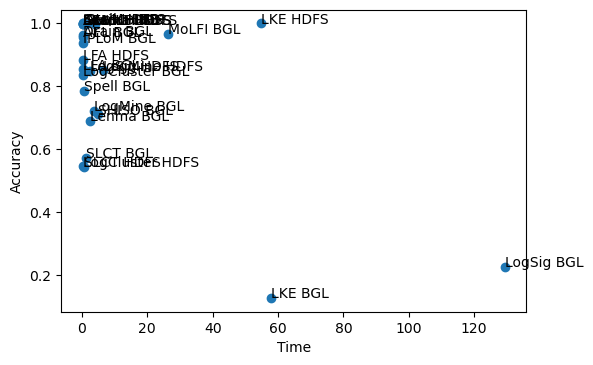

In [24]:
plt.figure(dpi=100)
plt.scatter(final_df["time"], final_df["accuracy"])
plt.xlabel("Time")
plt.ylabel("Accuracy")
for i, row in final_df.iterrows():
    plt.annotate(f"{row['algo']} {row['dataset']}", (row["time"], row["accuracy"]))


Most algorithms are fast, although they have varying accuracies. LKE and LogSig are clear outliers, due to a longer execution time.


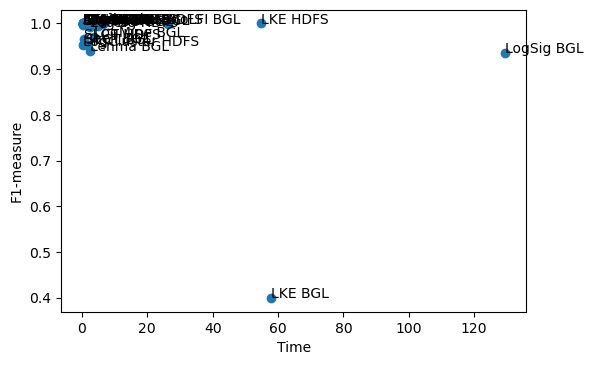

In [25]:
plt.figure(dpi=100)
plt.scatter(final_df["time"], final_df["f1_measure"])
plt.xlabel("Time")
plt.ylabel("F1-measure")
for i, row in final_df.iterrows():
    plt.annotate(f"{row['algo']} {row['dataset']}", (row["time"], row["f1_measure"]))


We can notice that LKE and LogSig are also outliers in terms of F1-measure over time. These algorithms are not efficient.

Removing them yields the following graph:


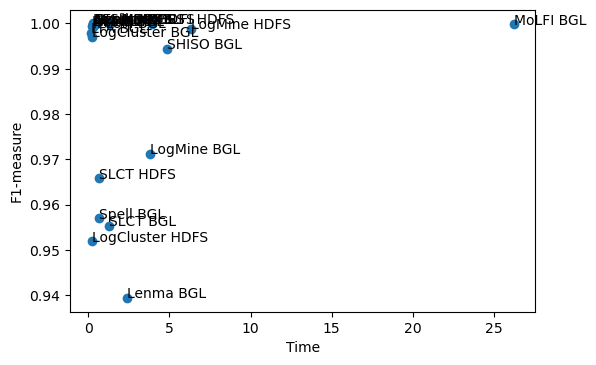

In [26]:
filtered_final_df = final_df[(final_df.algo != "LKE") & (final_df.algo != "LogSig")]

plt.figure(dpi=100)
plt.scatter(filtered_final_df["time"], filtered_final_df["f1_measure"])
plt.xlabel("Time")
plt.ylabel("F1-measure")
for i, row in filtered_final_df.iterrows():
    plt.annotate(f"{row['algo']} {row['dataset']}", (row["time"], row["f1_measure"]))


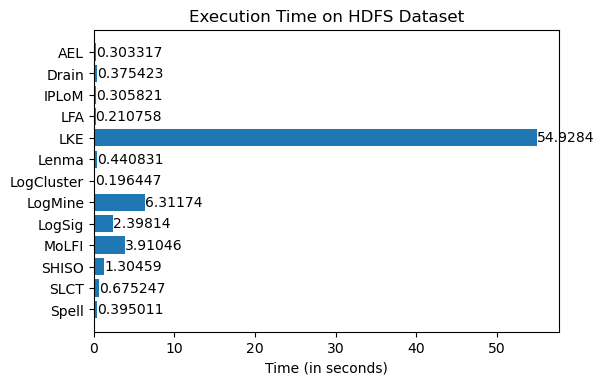

In [27]:
fig, ax = plt.subplots()

hdfs_df = final_df[final_df.dataset == "HDFS"]
bgl_df = final_df[final_df.dataset == "BGL"]

plt.barh(hdfs_df["algo"], hdfs_df["time"])
ax.invert_yaxis()
ax.set_xlabel("Time (in seconds)")
ax.set_title("Execution Time on HDFS Dataset")
ax.bar_label(ax.containers[0])
fig.set_dpi(100)
plt.show()


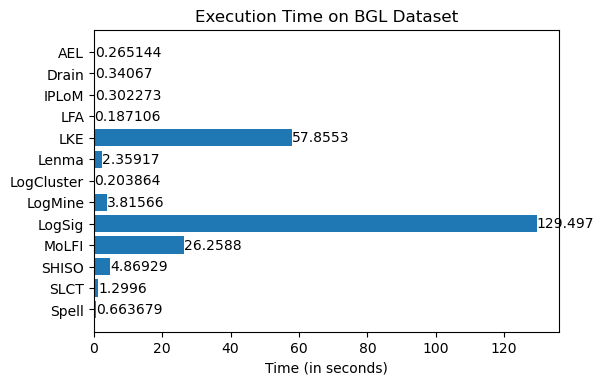

In [28]:
fig, ax = plt.subplots()

plt.barh(bgl_df["algo"], bgl_df["time"])
ax.invert_yaxis()
ax.set_xlabel("Time (in seconds)")
ax.set_title("Execution Time on BGL Dataset")
ax.bar_label(ax.containers[0])
fig.set_dpi(100)
plt.show()


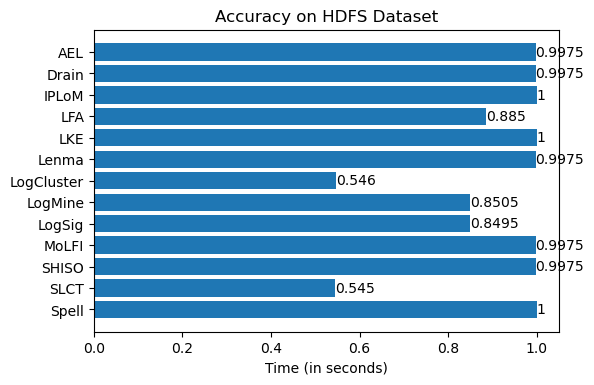

In [29]:
fig, ax = plt.subplots()

plt.barh(hdfs_df["algo"], hdfs_df["accuracy"])
ax.invert_yaxis()
ax.set_xlabel("Time (in seconds)")
ax.set_title("Accuracy on HDFS Dataset")
ax.bar_label(ax.containers[0])
fig.set_dpi(100)
plt.show()


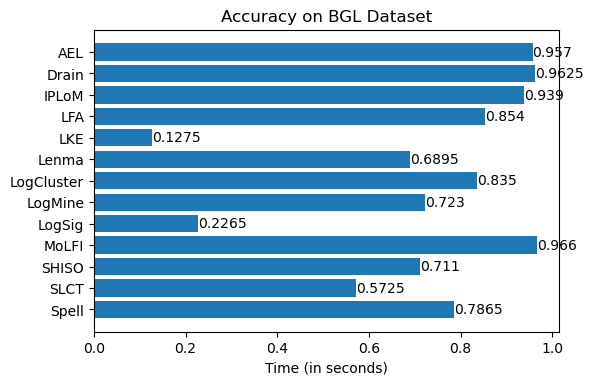

In [30]:
fig, ax = plt.subplots()

plt.barh(bgl_df["algo"], bgl_df["accuracy"])
ax.invert_yaxis()
ax.set_xlabel("Time (in seconds)")
ax.set_title("Accuracy on BGL Dataset")
ax.bar_label(ax.containers[0])
fig.set_dpi(100)
plt.show()


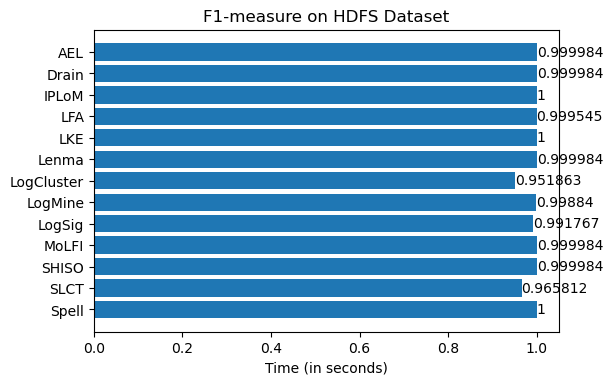

In [31]:
fig, ax = plt.subplots()

plt.barh(hdfs_df["algo"], hdfs_df["f1_measure"])
ax.invert_yaxis()
ax.set_xlabel("Time (in seconds)")
ax.set_title("F1-measure on HDFS Dataset")
ax.bar_label(ax.containers[0])
fig.set_dpi(100)
plt.show()


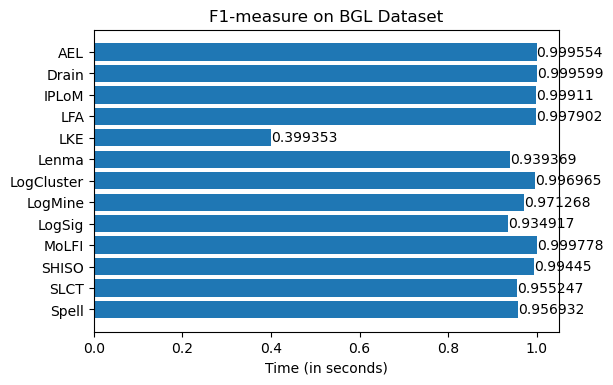

In [32]:
fig, ax = plt.subplots()

plt.barh(bgl_df["algo"], bgl_df["f1_measure"])
ax.invert_yaxis()
ax.set_xlabel("Time (in seconds)")
ax.set_title("F1-measure on BGL Dataset")
ax.bar_label(ax.containers[0])
fig.set_dpi(100)
plt.show()

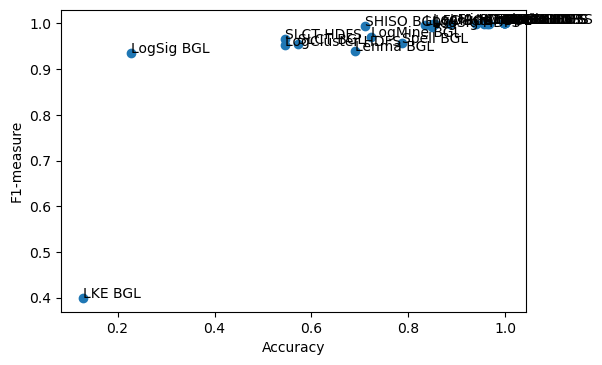

In [33]:
plt.figure(dpi=100)
plt.scatter(final_df["accuracy"], final_df["f1_measure"])
plt.xlabel("Accuracy")
plt.ylabel("F1-measure")
for i, row in final_df.iterrows():
    plt.annotate(
        f"{row['algo']} {row['dataset']}", (row["accuracy"], row["f1_measure"])
    )


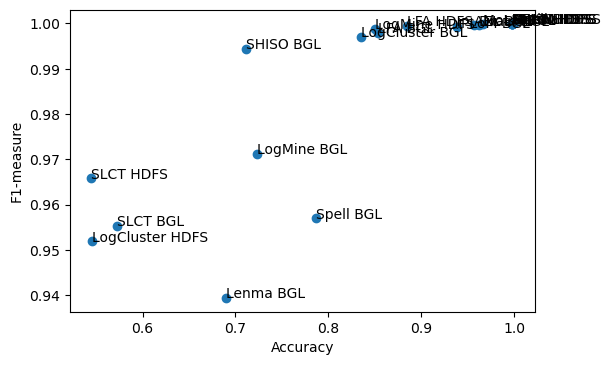

In [34]:
plt.figure(dpi=100)
plt.scatter(filtered_final_df["accuracy"], filtered_final_df["f1_measure"])
plt.xlabel("Accuracy")
plt.ylabel("F1-measure")
for i, row in filtered_final_df.iterrows():
    plt.annotate(
        f"{row['algo']} {row['dataset']}", (row["accuracy"], row["f1_measure"])
    )
